In [1]:
import rclpy as rp 
from rclpy.node import Node 
from geometry_msgs.msg import Twist
from std_msgs.msg import Float32
from geometry_msgs.msg import PoseStamped
rp.init()

In [3]:
class node(Node):
    def __init__(self):
        super().__init__('mycar_publisher')
        self.create_subscription(PoseStamped, '/tracked_pose', self.battery_callback, 10)
        self.msg = None 

    def battery_callback(self, msg):
        self.msg = msg


In [4]:
node = node()
rp.spin_once(node)

In [9]:
position = node.msg.pose.position 
orientation = node.msg.pose.orientation

In [12]:
position

geometry_msgs.msg.Point(x=-0.04210811978998984, y=-0.001273162357952039, z=0.0)

In [13]:
orientation

geometry_msgs.msg.Quaternion(x=0.0, y=0.0, z=0.007373144616281179, w=0.9999728179998032)

In [1]:
import time 
import threading
import rclpy as rp 
import matplotlib.pyplot as plt
import cv2
from rclpy.node import Node 
from geometry_msgs.msg import Twist
from std_msgs.msg import Float32
from geometry_msgs.msg import PoseStamped
rp.init()

class MyNode(Node):
    def __init__(self):
        super().__init__('mycar_publisher')
        self.create_subscription(PoseStamped, '/tracked_pose', self.battery_callback, 10)
        self.msg = None 

    def battery_callback(self, msg):
        self.msg = msg

class CarThread(threading.Thread):
    def __init__(self, target):
        super().__init__()
        self.target_function = target  
        self.running = True
        self.pos_x, self.pos_y = 0, 0

    def run(self):
        while self.running: 
            self.target_function() 

    def stop(self):
        self.running = False 

class Run_Node():
    def __init__(self):
        self.img = cv2.imread('/root/ros-repo-3/src/Server/DB/map/asap_map_resized.pgm')
        self.mynode = MyNode()
        print(self.mynode.msg)

    def run_node(self):
        rp.spin(self.mynode)

    def start_thread(self):
        self.mythread = threading.Thread(target=self.run_node)
        self.mythread.start()

    def run(self):
        
        try:
            position = self.mynode.msg.pose.position 
            orientation = self.mynode.msg.pose.orientation
            self.pos_x, self.pos_y = position.x, position.y
        except:
            pass
run_node = Run_Node()
run_node.start_thread()


None


In [6]:
origin_x = 0 
origin_y = 306
yaml_x = -0.84 
yaml_y = -0.94

px = 0.84 
py = 0.94 


pos_x : -0.027827827923940354 pos_y : -0.013325333507947276


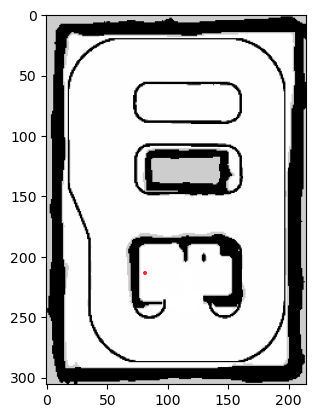

In [25]:
run_node.run()
pos_x, pos_y = run_node.pos_x, run_node.pos_y
print(f"pos_x : {pos_x} pos_y : {pos_y}")
pos_x = (px + pos_x)*100
pos_y = origin_y - (py + pos_y)*100

fig, ax = plt.subplots() 
circle = plt.Circle((pos_x, pos_y), 1, color='red', fill=False)
ax.add_patch(circle)
plt.imshow(run_node.img)
# ax.add_image(run_node.img)
ax.set_aspect('equal')
plt.show()

In [25]:
origin_x = 0 
origin_y = 306
yaml_x = -0.84 
yaml_y = -0.94

In [31]:
-0.84 + 0.01*(215)

1.31

In [28]:
2.11 + 0.962

3.072